# Cameron and Trivedi, "Microeconometrics Using Stata"

### https://youtu.be/VGRDR3J346M

In [1]:
import os
os.chdir("C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/")
import stata_setup
stata_setup.config("C:/Program Files/Stata17", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 20 Mar 2022
Serial number: 401709302059
  Licensed to: Joonhee Lee
               KAIST

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [2]:
%%stata
* "C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/"
dir


. * "C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/"
. dir
  <dir>   3/16/22 14:50  .                 
  <dir>   3/15/22 18:15  ..                
  <dir>   3/14/22 22:30  data              
  <dir>   3/16/22 14:31  data (1)          
 526.6k   3/02/22 21:22  data (1).zip      
 813.2k   3/02/22 21:22  data (2).zip      
  82.6k   3/02/22 21:22  data.zip          
  <dir>   3/14/22 15:31  results           

. 


In [3]:
%%stata
*set more off
version 13
clear all // removes data and value labels from memory


. *set more off
. version 13

. clear all // removes data and value labels from memory

. 


In [4]:
import pandas as pd
pd.read_stata('data/mus08psidextract.dta')

,exp,wks,occ,ind,south,smsa,ms,fem,union,ed,...,id,t,tdum1,tdum2,tdum3,tdum4,tdum5,tdum6,tdum7,exp2
0,3.0,32.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,...,1.0,1.0,1,0,0,0,0,0,0,9.0
1,4.0,43.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,...,1.0,2.0,0,1,0,0,0,0,0,16.0
2,5.0,40.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,...,1.0,3.0,0,0,1,0,0,0,0,25.0
3,6.0,39.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,...,1.0,4.0,0,0,0,1,0,0,0,36.0
4,7.0,42.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0,...,1.0,5.0,0,0,0,0,1,0,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,3.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,...,595.0,3.0,0,0,1,0,0,0,0,9.0
4161,4.0,49.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,...,595.0,4.0,0,0,0,1,0,0,0,16.0
4162,5.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,...,595.0,5.0,0,0,0,0,1,0,0,25.0
4163,6.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,...,595.0,6.0,0,0,0,0,0,1,0,36.0


In [5]:
%%stata
* Read in Data
use data/mus08psidextract.dta, clear
desc


. * Read in Data
. use data/mus08psidextract.dta, clear
(PSID wage data 1976-82 from Baltagi and Khanti-Akom (1990))

. desc

Contains data from data/mus08psidextract.dta
 Observations:         4,165                  PSID wage data 1976-82 from
                                                Baltagi and Khanti-Akom (1990)
    Variables:            22                  26 Nov 2008 17:15
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
exp             float   %9.0g                 years of full-time work
                                                experience
wks             float   %9.0g                 weeks worked
occ             float   %9.0g                 occupation; occ==1 if in a
                         

In [6]:
%stata summarize


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         exp |      4,165    19.85378    10.96637          1         51
         wks |      4,165    46.81152    5.129098          5         52
         occ |      4,165    .5111645    .4999354          0          1
         ind |      4,165    .3954382    .4890033          0          1
       south |      4,165    .2902761    .4539442          0          1
-------------+---------------------------------------------------------
        smsa |      4,165    .6537815     .475821          0          1
          ms |      4,165    .8144058    .3888256          0          1
         fem |      4,165     .112605    .3161473          0          1
       union |      4,165    .3639856    .4812023          0          1
          ed |      4,165    12.84538    2.787995          4         17
-------------+-------------------------------------------------

In [7]:
%%stata
* check organization of dataset
list id t exp wks occ in 1/3, clean
* reshape: wide -> long


. * check organization of dataset
. list id t exp wks occ in 1/3, clean

       id   t   exp   wks   occ  
  1.    1   1     3    32     0  
  2.    1   2     4    43     0  
  3.    1   3     5    40     0  

. * reshape: wide -> long
. 


In [8]:
%%stata 
* declare individual identifier and time identifier
xtset id t


. * declare individual identifier and time identifier
. xtset id t

Panel variable: id (strongly balanced)
 Time variable: t, 1 to 7
         Delta: 1 unit

. 


In [9]:
%%stata 
* panel description of dataset
xtdescribe


. * panel description of dataset
. xtdescribe

      id:  1, 2, ..., 595                                    n =        595
       t:  1, 2, ..., 7                                      T =          7
           Delta(t) = 1 unit
           Span(t)  = 7 periods
           (id*t uniquely identifies each observation)

Distribution of T_i:   min      5%     25%       50%       75%     95%     max
                         7       7       7         7         7       7       7

     Freq.  Percent    Cum. |  Pattern
 ---------------------------+---------
      595    100.00  100.00 |  1111111
 ---------------------------+---------
      595    100.00         |  XXXXXXX

. 


In [10]:
%%stata 
* panel summary statistics: within and between variation
xtsum id t lwage ed exp exp2 wks south tdum1


. * panel summary statistics: within and between variation
. xtsum id t lwage ed exp exp2 wks south tdum1

Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
id       overall |       298   171.7821          1        595 |     N =    4165
         between |              171.906          1        595 |     n =     595
         within  |                    0        298        298 |     T =       7
                 |                                            |
t        overall |         4    2.00024          1          7 |     N =    4165
         between |                    0          4          4 |     n =     595
         within  |              2.00024          1          7 |     T =       7
                 |                                            |
lwage    overall |  6.676346   .4615122    4.60517      8.537 |     N =    4165
         between |             .3942387     

In [11]:
%%stata 
* transition probabilities for a variable
xttrans south, freq


. * transition probabilities for a variable
. xttrans south, freq

residence; |
  south==1 |  residence; south==1
 if in the | if in the South area
South area |         0          1 |     Total
-----------+----------------------+----------
         0 |     2,527          8 |     2,535 
           |     99.68       0.32 |    100.00 
-----------+----------------------+----------
         1 |         8      1,027 |     1,035 
           |      0.77      99.23 |    100.00 
-----------+----------------------+----------
     Total |     2,535      1,035 |     3,570 
           |     71.01      28.99 |    100.00 

. 



. * simple time-series plot for each of 20 individuals
. quietly xtline lwage if id<=20, overlay legen(off) saving(lwage, replace)

. 


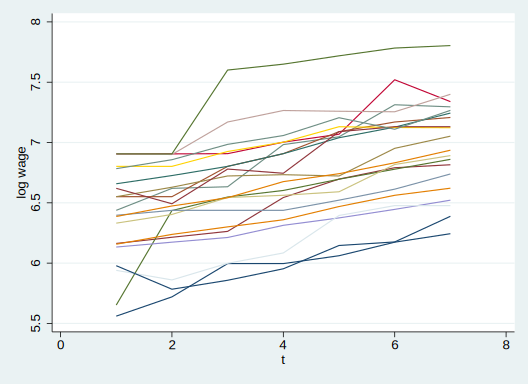

In [12]:
%%stata 
* simple time-series plot for each of 20 individuals
quietly xtline lwage if id<=20, overlay legen(off) saving(lwage, replace)

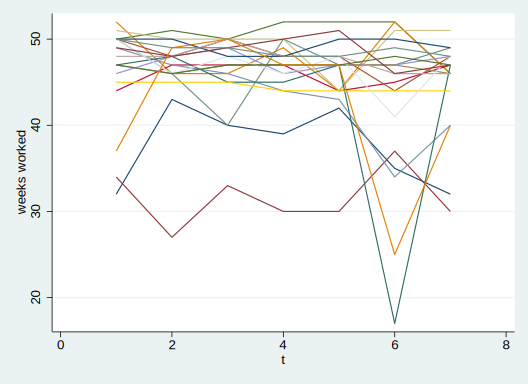

In [13]:
%stata quietly xtline wks if id<=20, overlay legen(off) saving(wks, replace)

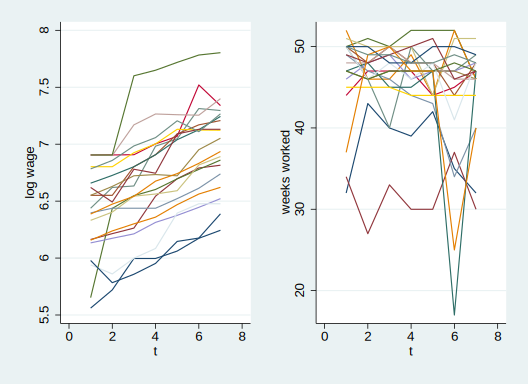

In [14]:
%stata graph combine lwage.gph wks.gph, iscale(1)

In [15]:
%%stata
erase lwage.gph
erase wks.gph


. erase lwage.gph

. erase wks.gph

. 



. * scatterplot, quadratic fit and nonparametric regression (lowess)
. graph twoway (scatter lwage exp) (qfit lwage exp) (lowess lwage exp)

. 


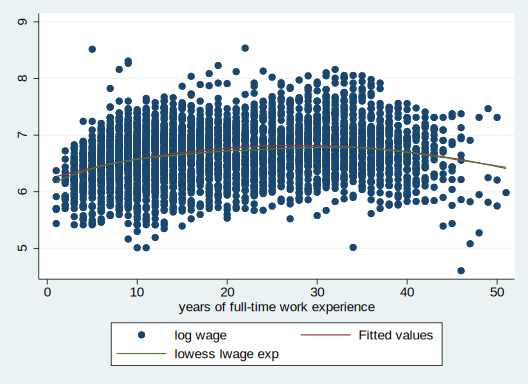

In [16]:
%%stata
* scatterplot, quadratic fit and nonparametric regression (lowess)
graph twoway (scatter lwage exp) (qfit lwage exp) (lowess lwage exp)


. * scatterplot for within variation
. preserve

. xtdata, fe

. graph twoway (scatter lwage exp) (qfit lwage exp) (lowess lwage exp)

. restore

. 


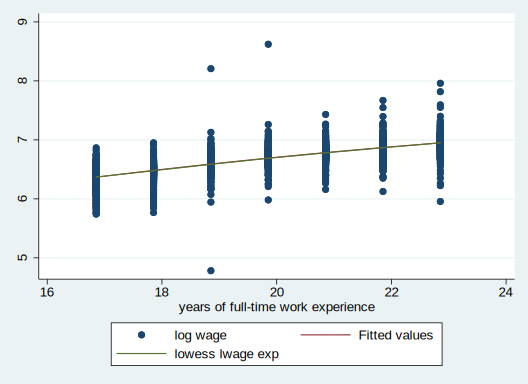

In [17]:
%%stata
* scatterplot for within variation
preserve
xtdata, fe
graph twoway (scatter lwage exp) (qfit lwage exp) (lowess lwage exp)
restore

In [18]:
%%stata
* macro for a list of explanator variables
global xlist exp exp2 wks ed

* pooled OLS with cluster-robust standard errors
regress lwage $xlist, vce(cluster id)


. * macro for a list of explanator variables
. global xlist exp exp2 wks ed

. 
. * pooled OLS with cluster-robust standard errors
. regress lwage $xlist, vce(cluster id)

Linear regression                               Number of obs     =      4,165
                                                F(4, 594)         =      72.58
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2836
                                                Root MSE          =     .39082

                                   (Std. err. adjusted for 595 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         exp |    .044675   .0054385     8.21   0.000     .0339941     .055356


In [19]:
%%stata
* pooled OLS with incorrect default standard errors
regress lwage $xlist


. * pooled OLS with incorrect default standard errors
. regress lwage $xlist

      Source |       SS           df       MS      Number of obs   =     4,165
-------------+----------------------------------   F(4, 4160)      =    411.62
       Model |  251.491445         4  62.8728613   Prob > F        =    0.0000
    Residual |  635.413457     4,160  .152743619   R-squared       =    0.2836
-------------+----------------------------------   Adj R-squared   =    0.2829
       Total |  886.904902     4,164  .212993492   Root MSE        =    .39082

------------------------------------------------------------------------------
       lwage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         exp |    .044675   .0023929    18.67   0.000     .0399838    .0493663
        exp2 |  -.0007156   .0000528   -13.56   0.000    -.0008191   -.0006121
         wks |    .005827   .0011827     4.93   0.0

In [20]:
%%stata
* within or FE estimator with cluster-robust standard errors
xtreg lwage $xlist, fe vce(cluster id)
dis "Rsquared = " e(r2)


. * within or FE estimator with cluster-robust standard errors
. xtreg lwage $xlist, fe vce(cluster id)
note: ed omitted because of collinearity

Fixed-effects (within) regression               Number of obs      =      4165
Group variable: id                              Number of groups   =       595

R-sq:  Within  = 0.6566                         Obs per group: min =         7
       Between = 0.0276                                        avg =       7.0
       Overall = 0.0476                                        max =         7

                                                F(3,594)           =   1059.72
corr(u_i, Xb)  = -0.9107                        Prob > F           =    0.0000

                                   (Std. err. adjusted for 595 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------

In [21]:
%%stata
* dummy variable regression
areg lwage $xlist, absorb(id) vce(cluster id)

* dummy variable regression using factor variables
quietly regress lwage $xlist i.id, vce(cluster id)
estimate table, keep($xlist _cons) b se b(%12.7f)

* use areg, donot use


. * dummy variable regression
. areg lwage $xlist, absorb(id) vce(cluster id)
note: ed omitted because of collinearity.

Linear regression, absorbing indicators             Number of obs     =  4,165
Absorbed variable: id                               No. of categories =    595
                                                    F(3, 594)         = 908.44
                                                    Prob > F          = 0.0000
                                                    R-squared         = 0.9068
                                                    Adj R-squared     = 0.8912
                                                    Root MSE          = 0.1522

                                   (Std. err. adjusted for 595 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+-------------------------------------

In [22]:
%%stata
* between estimator with default standard errors
xtreg lwage $xlist, be
dis "Rsquared = "e(r2)


. * between estimator with default standard errors
. xtreg lwage $xlist, be

Between regression (regression on group means)  Number of obs     =      4,165
Group variable: id                              Number of groups  =        595

R-squared:                                      Obs per group:
     Within  = 0.1357                                         min =          7
     Between = 0.3264                                         avg =        7.0
     Overall = 0.2723                                         max =          7

                                                F(4,590)          =      71.48
sd(u_i + avg(e_i.)) = .324656                   Prob > F          =     0.0000

------------------------------------------------------------------------------
       lwage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         exp |    .038153   .0056967     6.70   0.000     .0269647

In [23]:
%%stata
* random-effect estimator with cluster-robust se
xtreg lwage $xlist, re vce(cluster id)

dis "Rsquared = "e(r2)
dis "Rsquared = "e(r2_o)


. * random-effect estimator with cluster-robust se
. xtreg lwage $xlist, re vce(cluster id)

Random-effects GLS regression                   Number of obs     =      4,165
Group variable: id                              Number of groups  =        595

R-squared:                                      Obs per group:
     Within  = 0.6340                                         min =          7
     Between = 0.1716                                         avg =        7.0
     Overall = 0.1830                                         max =          7

                                                Wald chi2(4)      =    1598.50
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =     0.0000

                                   (Std. err. adjusted for 595 clusters in id)
------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+

In [27]:
%%stata
* compare OLS, BE, FE, RE estimators, and methods to compute se
quietly regress lwage $xlist, vce(cluster id)
estimates store OLS_rob
quietly xtreg lwage $xlist, be
estimates store BE
quietly xtreg lwage $xlist, fe
estimates store FE
quietly xtreg lwage $xlist, fe vce(robust)
estimates store FE_rob
quietly xtreg lwage $xlist, re
estimates store RE
quietly xtreg lwage $xlist, re vce(robust)
estimates store RE_rob

estimate table OLS_rob BE FE FE_rob RE RE_rob, ///
b se stats(N r2 f2_o r2_b r2_w sigma_u sigma_e rho) b(%7.4f)


. * compare OLS, BE, FE, RE estimators, and methods to compute se
. quietly regress lwage $xlist, vce(cluster id)

. estimates store OLS_rob

. quietly xtreg lwage $xlist, be

. estimates store BE

. quietly xtreg lwage $xlist, fe

. estimates store FE

. quietly xtreg lwage $xlist, fe vce(robust)

. estimates store FE_rob

. quietly xtreg lwage $xlist, re

. estimates store RE

. quietly xtreg lwage $xlist, re vce(robust)

. estimates store RE_rob

. 
. estimate table OLS_rob BE FE FE_rob RE RE_rob, ///
> b se stats(N r2 f2_o r2_b r2_w sigma_u sigma_e rho) b(%7.4f)

--------------------------------------------------------------------------
    Variable |  OLS_rob       BE          FE        FE_rob        RE      
-------------+------------------------------------------------------------
         exp |    0.0447      0.0382      0.1138      0.1138      0.0889  
             |    0.0054      0.0057      0.0025      0.0040      0.0028  
        exp2 |   -0.0007     -0.0006     -0.0004  

In [28]:
%%stata
* Hausman text assuming RE estimator is fully efficient under null hypothesis
hausman FE RE, sigmamore


. * Hausman text assuming RE estimator is fully efficient under null hypothesis
. hausman FE RE, sigmamore

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |       FE           RE         Difference       Std. err.
-------------+----------------------------------------------------------------
         exp |    .1137879     .0888609        .0249269        .0012778
        exp2 |   -.0004244    -.0007726        .0003482        .0000285
         wks |    .0008359     .0009658       -.0001299        .0001108
------------------------------------------------------------------------------
                          b = Consistent under H0 and Ha; obtained from xtreg.
           B = Inconsistent under Ha, efficient under H0; obtained from xtreg.

Test of H0: Difference in coefficients not systematic

    chi2(3) = (b-B)'[(V_b-V_B)^(-1)](b-B)
            = 1513.02
Prob > chi2 =  0.0000

. 


In [29]:
%%stata
* difference estimator with cluster-robust standard errors
sort id t
regress D.(lwage exp exp2 wks ed), vce(cluster id) noconstant


. * difference estimator with cluster-robust standard errors
. sort id t

. regress D.(lwage exp exp2 wks ed), vce(cluster id) noconstant
note: D.ed omitted because of collinearity.

Linear regression                               Number of obs     =      3,570
                                                F(3, 594)         =    1035.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2209
                                                Root MSE          =     .18156

                                   (Std. err. adjusted for 595 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     D.lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         exp |
         D1. |   .1170654   .0040974    28.57   0.000